# DSCI 503 - Homework 04

### Seif Kungulio

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math

## Problem 1: Sample Mean and Variance

In this problem, will use NumPy to calculate sample mean and variance of data set in two ways:
1. Firsst using numpy to perform the calculations indicated by the formulas for these values, and
2. Then using built-in NumPy functions for mean and variance

In [2]:
# Create an array x
x = np.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])

# Store the length of the array in a variable n
n = len(x)

# Calculate the sample mean
mean = np.sum(x) / n

# Calculate the differences between each value in x and the mean
diff = x - mean

# Calculate the sample variance
var = np.sum(diff ** 2) / (n - 1)

# Print the results
print(f"Sample Mean: {mean:>9.2f}")
print(f"Sample Variance: {var:>.2f}")

Sample Mean:     16.60
Sample Variance: 25.60


In [3]:
# Using built-in NumPy functions
mean_np = np.mean(x)
var_np = np.var(x, ddof=1)

# Print the results using built-in functions
print(f"Sample Mean: {mean_np:>9.2f}")
print(f"Sample Variance: {var_np:>.2f}")

Sample Mean:     16.60
Sample Variance: 25.60


## Problem 2: Scoring a Regression Model

Assume that we wish to predict estimate the value of a variable y based on the values of other input variables. If y is a continuous numerical variable, then a function used to generate such estimations is called a **regression model**. When we know the true y values for a set of observations, we can evaluate the performance of our model by comparing the estimated y values to the actual values. There are several metrics that can be used for scoring a model in this way, but one of the most common is to calculate the model's **sum of squared errors (SSE)** score on the dataset.

The SSE score provides use with a tool for measuring the performance of a regression model. Models that produce estimates with smaller errors will have smaller SSE scores.

In [4]:

def find_sse(true_y, pred_y):
    
    # Calculate the Sum of Squared Errors (SSE) between true and predicted values.
    sse = np.sum((true_y - pred_y) ** 2)
    
    return sse


In [5]:
# Define the true and predicted values as numpy arrays
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])

# Calculate the SSE for each model
sse_1 = find_sse(true_y, pred_1)
sse_2 = find_sse(true_y, pred_2)

# Print the results
print(f"Model 1 SSE: {sse_1:.2f}")
print(f"Model 2 SSE: {sse_2:.2f}")

Model 1 SSE: 22.66
Model 2 SSE: 19.90


## Problem 3: Scoring a Classification Model

In this problem, a function find_accuracy() is designed to evaluate the accuracy of a classification model. This function takes two parameters, true_y and pred_y, representing the observed classes and predicted classes, respectively. It calculates the accuracy score, which is the proportion of correct predictions made by the model.

To apply this function to two different classification problems, we are given the true diagnoses and predicted diagnoses for detecting a disease in patients and the true labels and predicted labels for an image classification task.

For the disease detection problem, the true diagnoses and predicted diagnoses are provided as arrays named true_diag and pred_diag. We use find_accuracy() to calculate the accuracy of the classification model that generated these predictions.

Similarly, for the image classification problem, the true labels and predicted labels are provided as arrays named true_labels and pred_labels. We again use find_accuracy() to calculate the accuracy of the image classification model.

In [6]:

def find_accuracy(true_y, pred_y):

    # Calculate the accuracy score for a detection/ classification model.
    #true_y = np.array(true_y)
    #pred_y = np.array(pred_y)
    accuracy = np.mean(true_y == pred_y)
    
    return accuracy

In [7]:
# Disease detection model
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N', 'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'N', 'P', 'N'])

# Calculate accuracy for disease detection model
accuracy_diag = find_accuracy(true_diag, pred_diag)
print(f"Model Accuracy: {accuracy_diag:.4f}")

Model Accuracy: 0.7500


In [8]:
# Image classification model
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
                        'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
                        'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])

# Calculate accuracy for image classification model
accuracy_labels = find_accuracy(true_labels, pred_labels)
print(f"Model Accuracy: {accuracy_labels:.4f}")

Model Accuracy: 0.8750


## Problem 4: Classification Report

There are metrics other than accuracy that can be used to evaluate a classification model. Precision and recall are two such metrics that can be used to convey how well the model performs on observations in specific classes. Before we can officially define these metrics, we need to introduce a few preliminary definitions. In a binary classification problem, there are two possible classes. We will refer to one of the classes as the positive class and will refer to the other as the negative class. This designation is often arbitrary. Assume that we have used a classification model to generate class predictions for a data set. We can group the observations using the following designations:

An observation is considered to be:
- A **true positive** if it was predicted to be in the positive class, and actually was in the positive class.
- A **false positive** if it was predicted to be in the positive class, but actually was in the negative class.
- A **true negative** if it was predicted to be in the negative class, and actually was in the negative class.
- A **false negative** it it was predicted to be in the negative class, but actually was in the positive class.

For a set of predictions, let **TP**, **FP**, **TN**, and **FN** denote the number of true positives, false positives, true negatives, and false negatives, respectively.

The model's **positive precision**, **positive recall**, **negative precision**, and **negative recall** scores are defined as follows:
- **Positive Precision:** Number of True Positives / Number of Positive Predictions = TP / (TP + FP)
- **Positive Recall:** Number of True Positives / Number of Positive Observations = TP / (TP + FN)
- **Negative Precision:** Number of True Negatives / Number of Negative Predictions = TN / (TN + FN)
- **Negative Recall:** Number of True Negatives / Number of Negative Observations = TN / (TN + FP)

The precision for a particular class is an estimate of the probability of a correct classification, given that the model has classified an observation as that class. The recall for a particular class is an estimate of the probability of a correct classification, given that the observation is actually a member of that class.

In [9]:

def classification_report(true_y, pred_y):
    true_y = np.array(true_y)
    pred_y = np.array(pred_y)
    
    # Identify the unique classes
    classes = np.unique(true_y)
    negative_class = classes[0]
    positive_class = classes[1]
    
    # Calculate the model's accuracy
    accuracy = find_accuracy(true_y, pred_y)
    
    # Calculate TP, FP, TN, and FN
    TP = np.sum((true_y == positive_class) & (pred_y == positive_class))
    FP = np.sum((true_y == negative_class) & (pred_y == positive_class))
    TN = np.sum((true_y == negative_class) & (pred_y == negative_class))
    FN = np.sum((true_y == positive_class) & (pred_y == negative_class))
    
    # Calculate precision and recall
    pos_precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    pos_recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    neg_precision = TN / (TN + FN) if (TN + FN) > 0 else 0
    neg_recall = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    # Print the results
    print(f"Positive Class: {positive_class:>5}")
    print(f"Negative Class: {negative_class:>5}")
    print("")
    print(f"Accuracy: {accuracy:>16.4f}")
    print(f"Positive Precision: {pos_precision:>.4f}")
    print(f"Positive Recall: {pos_recall:>9.4f}")
    print(f"Negative Precision: {neg_precision:>.4f}")
    print(f"Negative Recall: {neg_recall:>9.4f}")


In [10]:
# Test the classification_report function with the given examples from Problem 3
print("Disease Detection Model Report:")
classification_report(true_diag, pred_diag)

Disease Detection Model Report:
Positive Class:     P
Negative Class:     N

Accuracy:           0.7500
Positive Precision: 0.5556
Positive Recall:    0.8333
Negative Precision: 0.9091
Negative Recall:    0.7143


In [11]:
# Test the classification_report function with the given examples from Problem 3
print("Image Classification Model Report:")
classification_report(true_labels, pred_labels)

Image Classification Model Report:
Positive Class:   dog
Negative Class:   cat

Accuracy:           0.8750
Positive Precision: 0.8333
Positive Recall:    0.9091
Negative Precision: 0.9167
Negative Recall:    0.8462


## Problem 5: Transformation of Random Variables

A **random variable** is a value associated with a person, object, or event that is assumed to be driven by a random process, and that will vary from one observation to the next. Every random variable has a probability distribution which can be used to calculate probabilities associated with that random variable. We do not always know (or even have a good guess about) the distribution of a random variable that we wish to work with.

Suppose that X is a random variable whose distribution we know, but we are interested in working with a different random variable Y that is defined as a function of X. That is, Y=f(X). In this case, we can sometimes use calculus and ideas from probability theory to determine the distribution of 𝑌, but that requires a lot of background knowledge and can be difficult to do.

As an alternative, we can estimate the probability that a transformed variable Y falls within a certain range by programmatically sampling several observations of X, transforming these into values of Y, and then determining the proportion of values that fall within the range in which we are interested. We can also use this technique to estimate quantities like the mean and standard deviation of Y. As long as we take a large enough sample from X, our estimates should be fairly accurate.

In [12]:
# Set the seed for reproducibility
np.random.seed(1)

# Sample 25,000 observations from a normal distribution with mean 0 and standard deviation 0.4
X = np.random.normal(0, 0.4, 25000)

# Transform X to Y using the function Y = exp(X)
Y = np.exp(X)

# Calculate sample mean and standard deviation for X
mean_X = np.mean(X)
std_dev_X = np.std(X, ddof=1)

# Calculate sample mean and standard deviation for Y
mean_Y = np.mean(Y)
std_dev_Y = np.std(Y, ddof=1)

# Print the results
print(f"Sample Mean of X: {mean_X:>9.4f}")
print(f"Sample Std Dev of X: {std_dev_X:>.4f}")
print(f"Sample Mean of Y: {mean_Y:>9.4f}")
print(f"Sample Std Dev of Y: {std_dev_Y:>.4f}")

Sample Mean of X:    0.0025
Sample Std Dev of X: 0.4002
Sample Mean of Y:    1.0862
Sample Std Dev of Y: 0.4537


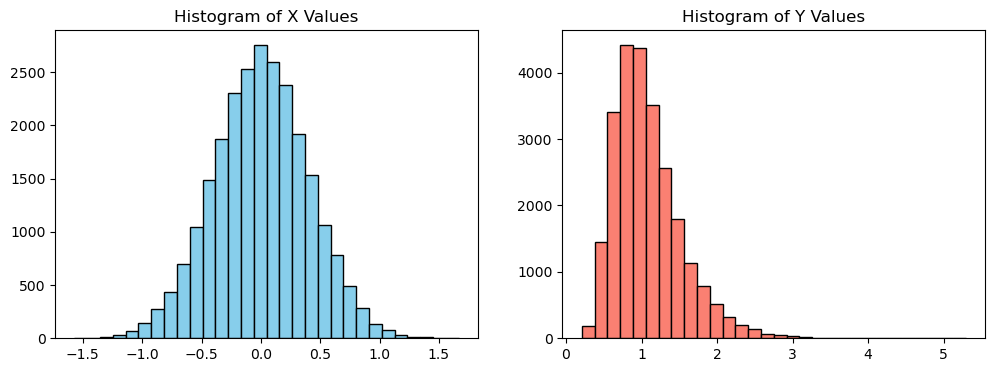

In [13]:
# Create histograms
plt.figure(figsize=[12, 4])

# Histogram of X
plt.subplot(1, 2, 1)
plt.hist(X, bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram of X Values')

# Histogram of Y
plt.subplot(1, 2, 2)
plt.hist(Y, bins=30, edgecolor='black', color='salmon')
plt.title('Histogram of Y Values')

# Show the figure
plt.show()

In [14]:
# Calculate the proportion of values in Y that are less than 0.5, 1, and 2
prob_less_than_0_5 = np.mean(Y < 0.5)
prob_less_than_1_0 = np.mean(Y < 1.0)
prob_less_than_2_0 = np.mean(Y < 2.0)

# Print the results
print(f"Probability that Y is less than 0.5: {prob_less_than_0_5:>.4f}")
print(f"Probability that Y is less than 1.0: {prob_less_than_1_0:>.4f}")
print(f"Probability that Y is less than 2.0: {prob_less_than_2_0:>.4f}")

Probability that Y is less than 0.5: 0.0410
Probability that Y is less than 1.0: 0.4969
Probability that Y is less than 2.0: 0.9574


## Problem 6: Stochastic Linear Relationships

This exercise focuses on understanding stochastic linear relationships between two random variables 𝑋 and 𝑌. The equation 𝑌=𝑎+𝑏⋅𝑋+𝜀 represents such a relationship, where 𝜀 is a random variable representing noise or error.

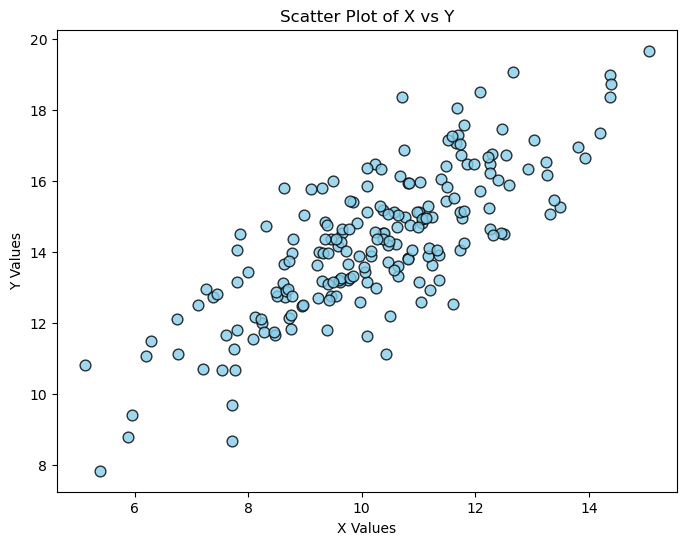

In [15]:
# Set the random seed for reproducibility
np.random.seed(1)

# Generate x_vals from a normal distribution
x_vals = np.random.normal(10, 2, 200)

# Generate errors from a normal distribution
errors = np.random.normal(0, 1.2, 200)

# Calculate y_vals using the given equation
y_vals = 5.1 + 0.9 * x_vals + errors

# Create scatter plot
plt.figure(figsize=[8, 6])
plt.scatter(x_vals, y_vals, s=60, alpha=0.8, edgecolor='black', color='skyblue')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of X vs Y')
plt.show()

In [16]:
# Calculate mean of x_vals and y_vals
mean_x = np.mean(x_vals)
mean_y = np.mean(y_vals)

# Calculate differences from the mean
diff_x = x_vals - mean_x
diff_y = y_vals - mean_y

# Calculate the numerator of the correlation coefficient
numerator = np.sum(diff_x * diff_y)

# Calculate the denominator of the correlation coefficient
denominator = np.sqrt(np.sum(diff_x**2) * np.sum(diff_y**2))

# Calculate the correlation coefficient
correlation = numerator / denominator

# Print the result
print(f'Correlation between X and Y: {correlation:.4f}')

Correlation between X and Y: 0.7861


## Problem 7: Relationship between Life Expectancy and Per Capita GDP

Using gapminder dataset, we will examine the relationship between life expectancy and per capita GDP. The dataset contains information about various countries, including their population, life expectancy, per capita GDP, and continent. We will create scatter plots to visualize the relationship between the natural log of per capita GDP and life expectancy for the year 2018, with points colored based on continent.

In [17]:
# Import pandas
import pandas as pd

# Load the gapminder data
df = pd.read_csv('gapminder_data.txt', sep='\t')

# Extract the relevant columns
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [18]:
# Define the lists for the continents and their corresponding colors.
continent_list = ['africa', 'americas', 'asia', 'europe']
color_list = ['green', 'blue', 'red', 'yellow']

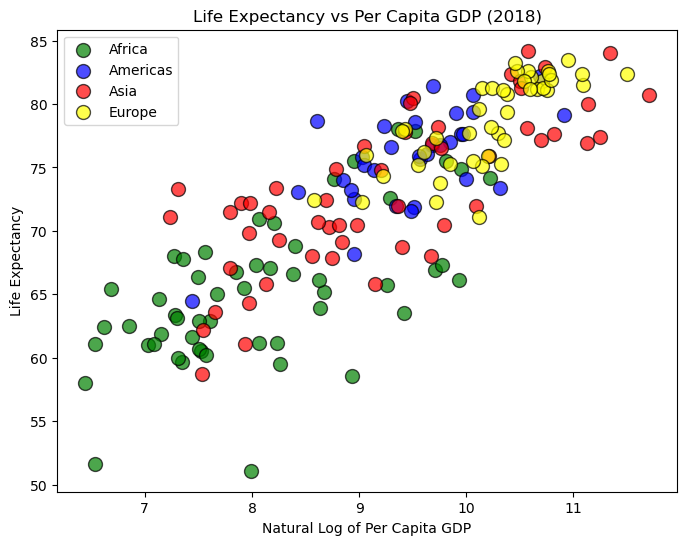

In [19]:
# Create the Scatter Plot for 2018 Data
# Set figure size
plt.figure(figsize=[8,6])

# Loop through each continent and create scatter plots
for i, continent_name in enumerate(continent_list):
    # Boolean selection for the current continent and year 2018
    sel = (continent == continent_name) & (year == 2018)
    
    # Add scatter plot
    plt.scatter(np.log(pcgdp[sel]), life_exp[sel], s=100, alpha=0.7,
                edgecolor='black', color=color_list[i], label=continent_name.title())

# Set labels and title
plt.xlabel('Natural Log of Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Per Capita GDP (2018)')
plt.legend()
plt.show()

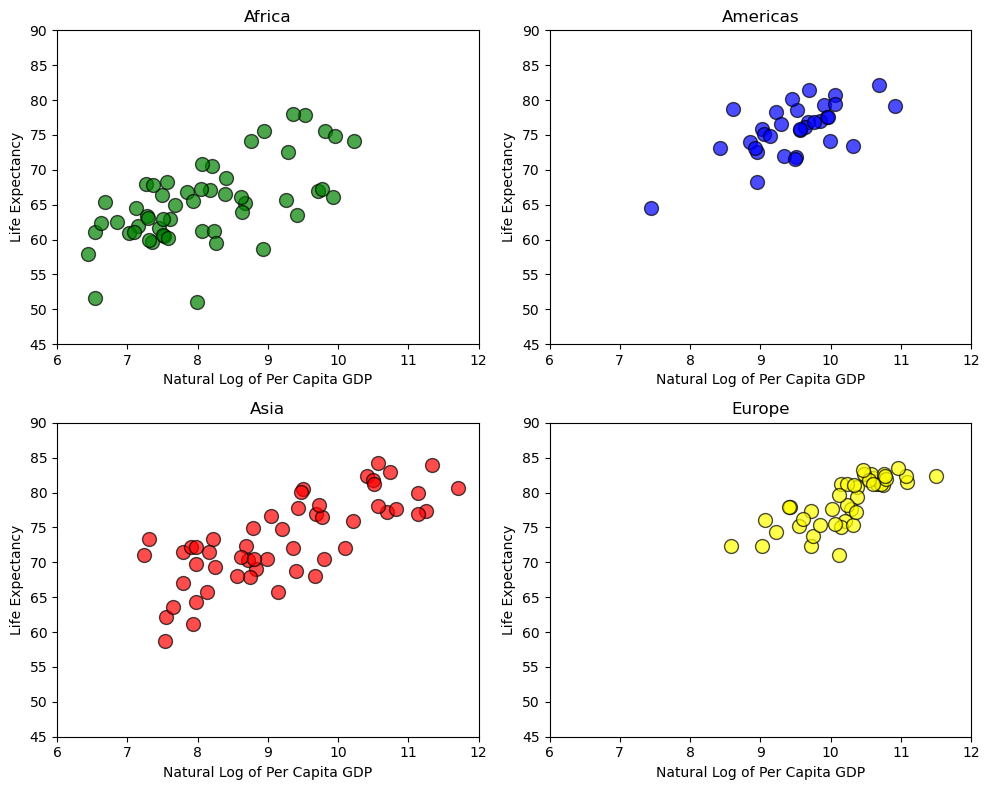

In [20]:
# Set figure size
plt.figure(figsize=[10,8])

# Loop through each continent and create subplots
for i, continent_name in enumerate(continent_list):
    plt.subplot(2, 2, i+1)
    
    # Boolean selection for the current continent and year 2018
    sel = (continent == continent_name) & (year == 2018)
    
    # Add scatter plot
    plt.scatter(np.log(pcgdp[sel]), life_exp[sel], s=100, alpha=0.7,
                edgecolor='black', color=color_list[i])
    
    # Set subplot limits, labels, and title
    plt.xlim([6, 12])
    plt.ylim([45, 90])
    plt.xlabel('Natural Log of Per Capita GDP')
    plt.ylabel('Life Expectancy')
    plt.title(continent_name.title())

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Problem 8: Trends by Country

In this exercise, we will create line plots to represent the change in population and life expectancy over time for selected countries using the Gapminder dataset.

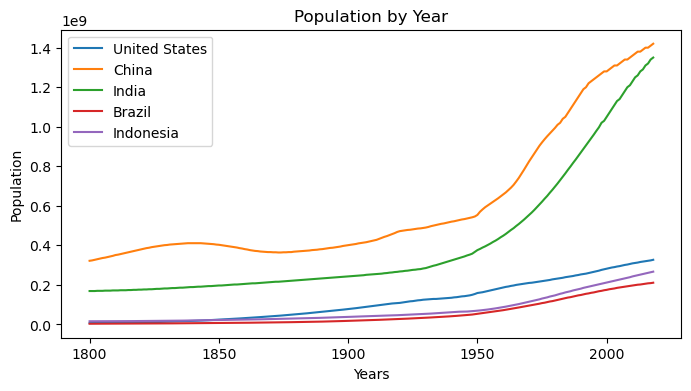

In [21]:
# Select 5 countries
selected_countries = ['United States', 'China', 'India', 'Brazil', 'Indonesia']

# Create a figure for population trends
plt.figure(figsize=[8, 4])

# Loop through each selected country and plot the population over time
for country_name in selected_countries:
    # Boolean selection for the current country
    sel = (country == country_name)
    
    # Plot population over time
    plt.plot(year[sel], population[sel], label=country_name)

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population by Year')
plt.legend()
plt.show()


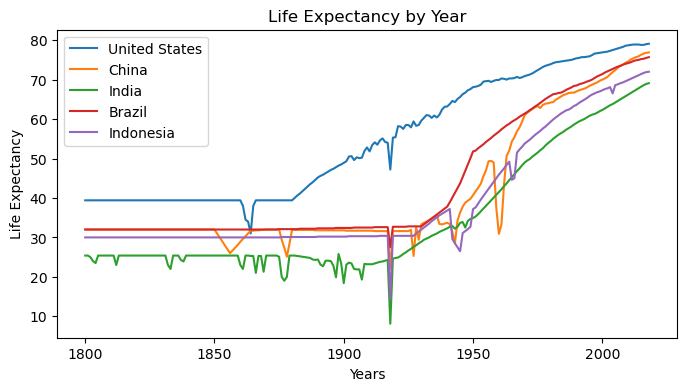

In [22]:
# Create a figure for life expectancy trends
plt.figure(figsize=[8, 4])

# Loop through each selected country and plot the life expectancy over time
for country_name in selected_countries:
    # Boolean selection for the current country
    sel = (country == country_name)
    
    # Plot life expectancy over time
    plt.plot(year[sel], life_exp[sel], label=country_name)

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year')
plt.legend()
plt.show()
